In [1]:
# ETHZ model: Meteorological situation of the observed and reference event
#
# Original: vikki.thompson 19/06/2023
# Last Editted 24/01/2025


In [1]:
### Load neccessary libraries
import subprocess
import numpy as np
import iris
import sys
import matplotlib.pyplot as plt
sys.path.append('/usr/people/thompson/WP1/boosting')
import functions_boosting as gboost
sys.path.append('/usr/people/thompson/WP1')
import functions_get_data as gdata
import functions_plot_data as pdata
import cartopy.crs as ccrs
import cartopy.feature as cf
from scipy.stats.stats import pearsonr
plt.ion(); plt.show()

/tmp/ipykernel_709724/3542856791.py:14: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
## Variables
date = [2021, 'Jul', 14] # event date
R1 = [70, 30, 30, -30] # large analogues region
pr = gboost.ETHZ_data('pr_mm', R1)

/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully 

In [3]:
# Create figure - for each event Z500 field (contour) and precip field (underlaid) for region R1
##
R_list = [15, 29, 11, 8, 22, 1, 13] 
D_list = [9, 19, 1, 25, 14, 28, 1]
M_list = ['Jul', 'Aug', 'Aug', 'Aug', 'Jul', 'Aug', 'Jul']
Y_list = [2035, 2034, 2016, 2007, 2027, 2009, 2033]
##

PREC = []; Z500 = []
for i in range(len(R_list)):
    R = R_list[i];
    D = D_list[i]; M = M_list[i]; Y = Y_list[i]
    print(R, D, M, Y)
    PREC.append(gboost.pull_out_day('pr_mm', R, D, M, Y))
    Z500.append(gboost.pull_out_day('Z500', R, D, M, Y))

15 9 Jul 2035


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))


29 19 Aug 2034


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))


11 1 Aug 2016


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))


8 25 Aug 2007


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))


22 14 Jul 2027


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))


1 28 Aug 2009


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))


13 1 Jul 2033


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:1085: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord bounds array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))


2021
0
2021
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

0
2021


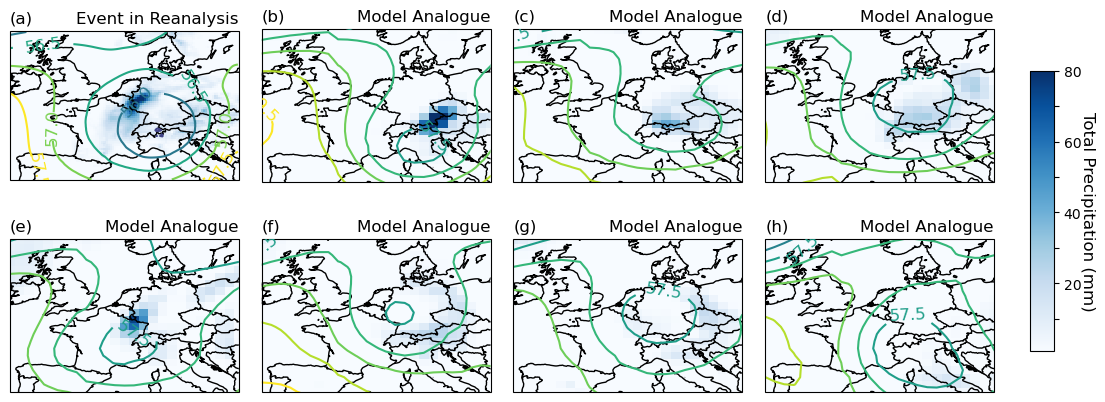

In [4]:
## Event choice supplementary figure
fig, axs = plt.subplots(nrows=2, ncols=4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,7))

# Observed event
R1 = [60, 40, 20, -10] # analog region
event_z500 = gdata.var_event_data('z500', R1, date)
event_prec = gdata.var_event_data('tp', R1, date)
lats=event_prec.coord('latitude').points
lons=event_prec.coord('longitude').points
#c = axs[0,0].contourf(lons, lats, event_prec.data, levels=np.linspace(1, 80, 9), cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree(), extend='max')
c = axs[0,0].pcolormesh(lons, lats, event_prec.data, vmin=1, vmax=80,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
fig.colorbar(c, cax=cbar_ax, ticks=np.arange(0, 100, 10))
cbar_ax.set_ylabel('Total Precipitation (mm)', labelpad=10, rotation=270, fontsize=12)
cbar_ax.set_yticklabels(['0', '', '20','','40','','60','','80',''])

lats=event_z500.coord('latitude').points
lons=event_z500.coord('longitude').points
c2 = axs[0,0].contour(lons, lats, event_z500.data/1000, levels=np.arange(55, 58, .5), cmap = plt.cm.get_cmap('viridis'), transform=ccrs.PlateCarree(), extend='both')
axs[0,0].clabel(c2, inline=1, fontsize=12)
axs[0,0].add_feature(cf.BORDERS)
axs[0,0].add_feature(cf.COASTLINE)
axs[0,0].set_title('(a)', loc='left')
axs[0,0].set_title('Event in Reanalysis', loc='right')

axs_list = [axs[0,1], axs[0,2], axs[0,3], axs[1,0], axs[1,1], axs[1,2], axs[1,3]]
for i, P in enumerate(PREC):
    lats=Z500[i].coord('latitude').points
    lons=Z500[i].coord('longitude').points
    #c = axs_list[i].contourf(lons, lats, P.data, levels=np.linspace(1, 80, 11), cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree(), extend='max')
    c = axs_list[i].pcolormesh(lons, lats, P.data, vmin=1, vmax=80,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())
    c2 = axs_list[i].contour(lons, lats, Z500[i].data/100, levels=np.arange(55, 60, .5), cmap = plt.cm.get_cmap('viridis'), transform=ccrs.PlateCarree(), extend='both')
    axs_list[i].set_ylim([40, 60])
    axs_list[i].set_xlim([-10, 20])
    axs_list[i].clabel(c2, inline=1, fontsize=12)
    axs_list[i].add_feature(cf.BORDERS)
    axs_list[i].add_feature(cf.COASTLINE)

for each in axs_list:
    each.set_title('Model Analogue', loc='right')

axs[0,1].set_title('(b)', loc='left')
axs[0,2].set_title('(c)', loc='left')
axs[0,3].set_title('(d)', loc='left')
axs[1,0].set_title('(e)', loc='left')
axs[1,1].set_title('(f)', loc='left')
axs[1,2].set_title('(g)', loc='left')
axs[1,3].set_title('(h)', loc='left')

plt.subplots_adjust(top = .8, bottom = .2, right = .82, left = 0, 
            hspace = 0, wspace = 0.1)
plt.margins(0,0)

2021
0
2021
2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

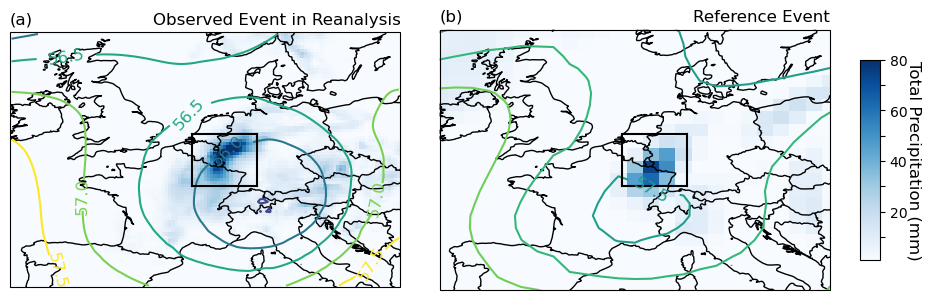

In [6]:
## Event choice - Observed event and boosted event (Fig 1)
fig, axs = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,5))

# Observed event
R1 = [60, 40, 20, -10] # analog region
event_z500 = gdata.var_event_data('z500', R1, date)
event_prec = gdata.var_event_data('tp', R1, date)
lats=event_prec.coord('latitude').points
lons=event_prec.coord('longitude').points
#c = axs[0].contourf(lons, lats, event_prec.data, levels=np.linspace(1, 80, 11), cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree(), extend='max')
c = axs[0].pcolormesh(lons, lats, event_prec.data, vmin=1, vmax=80,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
fig.colorbar(c, cax=cbar_ax, ticks=np.arange(0, 100, 10))
cbar_ax.set_ylabel('Total Precipitation (mm)', labelpad=10, rotation=270, fontsize=12)
cbar_ax.set_yticklabels(['0', '', '20','','40','','60','','80',''])

lats=event_z500.coord('latitude').points
lons=event_z500.coord('longitude').points
c2 = axs[0].contour(lons, lats, event_z500.data/1000, levels=np.arange(55, 58, .5), cmap = plt.cm.get_cmap('viridis'), transform=ccrs.PlateCarree(), extend='both')
axs[0].clabel(c2, inline=1, fontsize=12)
axs[0].add_feature(cf.BORDERS)
axs[0].add_feature(cf.COASTLINE)
axs[0].set_title('(a)', loc='left')
axs[0].set_title('Observed Event in Reanalysis', loc='right')

# reference event
lats=Z500[4].coord('latitude').points
lons=Z500[4].coord('longitude').points
#c = axs[1].contourf(lons, lats, PREC[3].data, levels=np.linspace(1, 80, 11), cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree(), extend='max')
c = axs[1].pcolormesh(lons, lats, PREC[3].data, vmin=1, vmax=80,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())
c2 = axs[1].contour(lons, lats, Z500[3].data/100, levels=np.arange(55, 60, .5), cmap = plt.cm.get_cmap('viridis'), transform=ccrs.PlateCarree(), extend='both')
axs[1].set_ylim([40, 60])
axs[1].set_xlim([-10, 20])
axs[1].clabel(c2, inline=1, fontsize=12)
axs[1].add_feature(cf.BORDERS)
axs[1].add_feature(cf.COASTLINE)
axs[1].set_title('(b)', loc='left')
axs[1].set_title('Reference Event', loc='right')
pdata.plot_box(axs[1], [48, 52, 4, 9])
pdata.plot_box(axs[0], [48, 52, 4, 9])

plt.subplots_adjust(top = .8, bottom = .2, right = .82, left = 0, 
            hspace = 0, wspace = 0.1)
plt.margins(0,0)

In [10]:

file = '/net/pc230042/nobackup_1/users/sager/ClimateExplorer/sandbox/ENSEMBLES/rr_0.25deg_reg_v30.0eu.nc'
eobs_cube = iris.load(file)[0]
iris.coord_categorisation.add_year(eobs_cube, 'time')
iris.coord_categorisation.add_season(eobs_cube, 'time')
iris.coord_categorisation.add_day_of_year(eobs_cube, 'time')
eobs_cube = eobs_cube.extract(iris.Constraint(season='jja'))
eobs_cube = eobs_cube.extract(iris.Constraint(year=2021))
eobs_cube = eobs_cube.extract(iris.Constraint(day_of_year=195))

2021
0
2021


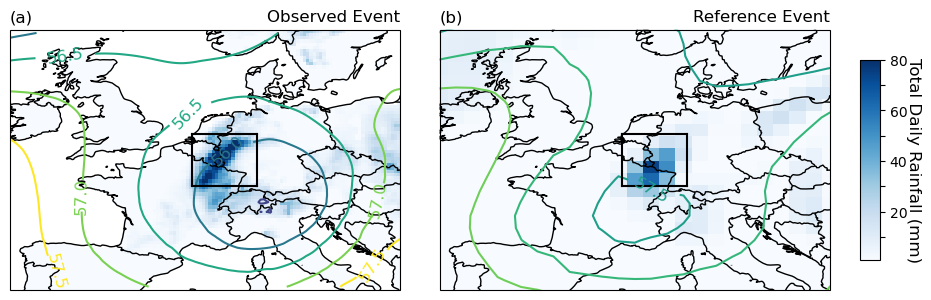

In [9]:
## Event choice - Observed event and boosted event (Fig 1)
fig, axs = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,5))

# Observed event
R1 = [60, 40, 20, -10] # analog region
event_z500 = gdata.var_event_data('z500', R1, date)


file = '/net/pc230042/nobackup_1/users/sager/ClimateExplorer/sandbox/ENSEMBLES/rr_0.25deg_reg_v30.0eu.nc'
eobs_cube = iris.load(file)[0]
iris.coord_categorisation.add_year(eobs_cube, 'time')
iris.coord_categorisation.add_season(eobs_cube, 'time')
iris.coord_categorisation.add_day_of_year(eobs_cube, 'time')
eobs_cube = eobs_cube.extract(iris.Constraint(season='jja'))
eobs_cube = eobs_cube.extract(iris.Constraint(year=2021))
eobs_cube = eobs_cube.extract(iris.Constraint(day_of_year=195))
lat_con = iris.Constraint(latitude=lambda cell: 40 < cell < 60)
lon_con = iris.Constraint(longitude=lambda cell: -10 < cell < 20)
event_prec = eobs_cube.extract(lat_con&lon_con)
lats=event_prec.coord('latitude').points
lons=event_prec.coord('longitude').points
c = axs[0].pcolormesh(lons, lats, event_prec.data, vmin=1, vmax=120,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())


#event_prec = gdata.var_event_data('tp', R1, date)
#lats=event_prec.coord('latitude').points
#lons=event_prec.coord('longitude').points
#c = axs[0].contourf(lons, lats, event_prec.data, levels=np.linspace(1, 80, 11), cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree(), extend='max')
c = axs[0].pcolormesh(lons, lats, event_prec.data, vmin=1, vmax=80,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
fig.colorbar(c, cax=cbar_ax, ticks=np.arange(0, 100, 10))
cbar_ax.set_ylabel('Total Daily Rainfall (mm)', labelpad=10, rotation=270, fontsize=12)
cbar_ax.set_yticklabels(['0', '', '20','','40','','60','','80',''])

lats=event_z500.coord('latitude').points
lons=event_z500.coord('longitude').points
c2 = axs[0].contour(lons, lats, event_z500.data/1000, levels=np.arange(55, 58, .5), cmap = plt.cm.get_cmap('viridis'), transform=ccrs.PlateCarree(), extend='both')
axs[0].clabel(c2, inline=1, fontsize=12)
axs[0].add_feature(cf.BORDERS)
axs[0].add_feature(cf.COASTLINE)
axs[0].set_title('(a)', loc='left')
axs[0].set_title('Observed Event', loc='right')

# reference event
lats=Z500[4].coord('latitude').points
lons=Z500[4].coord('longitude').points
#c = axs[1].contourf(lons, lats, PREC[3].data, levels=np.linspace(1, 80, 11), cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree(), extend='max')
c = axs[1].pcolormesh(lons, lats, PREC[3].data, vmin=1, vmax=80,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())
c2 = axs[1].contour(lons, lats, Z500[3].data/100, levels=np.arange(55, 60, .5), cmap = plt.cm.get_cmap('viridis'), transform=ccrs.PlateCarree(), extend='both')
axs[1].set_ylim([40, 60])
axs[1].set_xlim([-10, 20])
axs[1].clabel(c2, inline=1, fontsize=12)
axs[1].add_feature(cf.BORDERS)
axs[1].add_feature(cf.COASTLINE)
axs[1].set_title('(b)', loc='left')
axs[1].set_title('Reference Event', loc='right')
pdata.plot_box(axs[1], [48, 52, 4, 9])
pdata.plot_box(axs[0], [48, 52, 4, 9])

plt.subplots_adjust(top = .8, bottom = .2, right = .82, left = 0, 
            hspace = 0, wspace = 0.1)
plt.margins(0,0)

plt.savefig('ThompsonBoosting_Fig1.png', dpi=80)

2021
0
2021
2021
0
2021


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' invalid units 'mm/dy'
  warnings.warn(msg)
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:862: UserWarning: Ignoring netCDF variable 'tp' inv

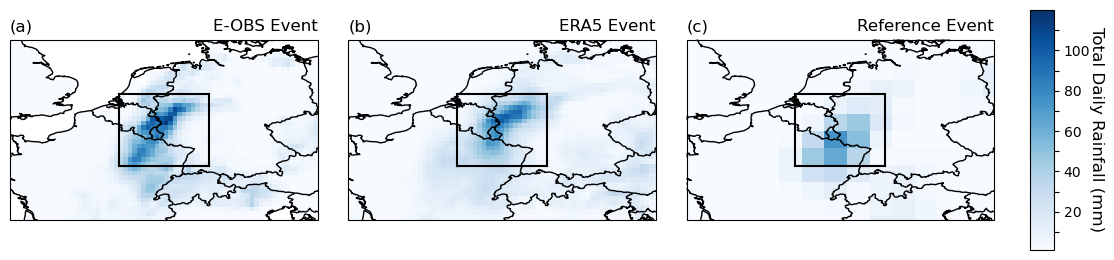

In [11]:
## Event choice - Observed event and boosted event (Fig S1)
fig, axs = plt.subplots(nrows=1, ncols=3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,12))

# E-OBS
date_obs = '2021195' # 14th July 2021

# Extremes in EObs
file = '/net/pc230042/nobackup_1/users/sager/ClimateExplorer/sandbox/ENSEMBLES/rr_0.25deg_reg_v30.0eu.nc'
eobs_cube = iris.load(file)[0]
iris.coord_categorisation.add_year(eobs_cube, 'time')
iris.coord_categorisation.add_season(eobs_cube, 'time')
iris.coord_categorisation.add_day_of_year(eobs_cube, 'time')
eobs_cube = eobs_cube.extract(iris.Constraint(season='jja'))
eobs_cube = eobs_cube.extract(iris.Constraint(year=2021))
eobs_cube = eobs_cube.extract(iris.Constraint(day_of_year=195))
lat_con = iris.Constraint(latitude=lambda cell: 40 < cell < 60)
lon_con = iris.Constraint(longitude=lambda cell: -10 < cell < 20)
event_prec = eobs_cube.extract(lat_con&lon_con)
lats=event_prec.coord('latitude').points
lons=event_prec.coord('longitude').points
c = axs[0].pcolormesh(lons, lats, event_prec.data, vmin=1, vmax=120,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())
event_z500 = gdata.var_event_data('z500', R1, date)
axs[0].add_feature(cf.BORDERS)
axs[0].add_feature(cf.COASTLINE)
axs[0].set_title('(a)', loc='left')
axs[0].set_title('E-OBS Event', loc='right')

# Observed event
R1 = [60, 40, 20, -10] # analog region
event_prec = gdata.var_event_data('tp', R1, date)
lats=event_prec.coord('latitude').points
lons=event_prec.coord('longitude').points
c = axs[1].pcolormesh(lons, lats, event_prec.data, vmin=1, vmax=120,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.4, 0.02, 0.2])
fig.colorbar(c, cax=cbar_ax, ticks=np.arange(0, 120, 10))
cbar_ax.set_ylabel('Total Daily Rainfall (mm)', labelpad=10, rotation=270, fontsize=12)
cbar_ax.set_yticklabels(['0', '', '20','','40','','60','','80','','100',''])
lats=event_z500.coord('latitude').points
lons=event_z500.coord('longitude').points
axs[1].add_feature(cf.BORDERS)
axs[1].add_feature(cf.COASTLINE)
axs[1].set_title('(b)', loc='left')
axs[1].set_title('ERA5 Event', loc='right')

# reference event
lats=Z500[4].coord('latitude').points
lons=Z500[4].coord('longitude').points
c = axs[2].pcolormesh(lons, lats, PREC[3].data, vmin=1, vmax=120,cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree())
axs[2].add_feature(cf.BORDERS)
axs[2].add_feature(cf.COASTLINE)
axs[2].set_title('(c)', loc='left')
axs[2].set_title('Reference Event', loc='right')

for ax in axs.reshape(-1): 
    pdata.plot_box(ax, [48, 52, 4, 9])
    ax.set_ylim([45, 55])
    ax.set_xlim([-2, 15])
    
plt.subplots_adjust(top = .8, bottom = .2, right = .82, left = 0, 
            hspace = 0, wspace = 0.1)
plt.margins(0,0)

plt.savefig('ThompsonBoosting_FigS1.png', dpi=80)
